##Projeto de Clusterização - Do Zero ao Relatório (VersF FColab)

Objetivo: Ajudar a ONG "HELP International"
Vamos usar dados socioeconômicos e de saúde para agrupar 167 países. Nosso objetivo é encontrar o grupo de países que está em extrema necessidade de ajuda humanitária.    
________________________________________________________________________

###Parte 1: Infraestrutura (Versão Colab)
No Google Colab, o ambiente já está "pronto". Ele é como um grande computador na nuvem que já tem Python e muitas bibliotecas instaladas.

Python 3.9+: O Colab já usa uma versão moderna do Python.

Ambiente Virtual: O próprio notebook do Colab é o seu ambiente virtual isolado. Você não precisa criar um venv ou conda.    

Vamos apenas garantir que as bibliotecas estão instaladas e gerar o requirements.txt que o projeto pede.

####Célula 1: Instalação de Bibliotecas
(Mesmo que já venham instaladas, é uma boa prática rodar para garantir)



In [ ]:
#!pip é como chamamos o instalador de pacotes dentro do Colab/Jupyter
print("Instalando/Verificando as bibliotecas necessárias...")
!pip install pandas matplotlib seaborn scikit-learn scipy

print("\nBibliotecas prontas!")

Instalando/Verificando as bibliotecas necessárias...

Bibliotecas prontas!


###Célula 2: Gerando o requirements.txt (Parte 1.4)
O projeto pede um arquivo requirements.txt. Este comando irá criar esse arquivo dentro do ambiente do Colab, listando todos os pacotes que o Colab usa.

In [ ]:
# O comando 'pip freeze' lista todos os pacotes e suas versões
# O '>' salva essa lista no arquivo 'requirements.txt'
!pip freeze > requirements.txt

print("Arquivo 'requirements.txt' gerado!")
print("Você pode vê-lo no painel de 'Arquivos' à esquerda. (Ícone da pasta)")

Arquivo 'requirements.txt' gerado!
Você pode vê-lo no painel de 'Arquivos' à esquerda. (Ícone da pasta)


**Sobre a Parte 1.5 (Printscreen) e 1.6 (Git):**

Printscreen: Como estamos no Colab, você pode tirar um print da sua tela do Colab rodando, ou justificar no seu trabalho que usou um ambiente em nuvem.

Git: Após terminar o notebook e gerar o requirements.txt, você pode baixar ambos (.ipynb e .txt) do Colab e enviá-los para um repositório Git público no seu computador.

###Parte 2: Escolha e Análise da Base de Dados

É hora de carregar os dados e "conversar" com eles.

Célula 3: Importações Principais
Primeiro, vamos importar nossa "caixa de ferramentas" para a análise.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Configurações para deixar os gráficos mais bonitos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão dos gráficos

print("Bibliotecas de análise importadas!")

Bibliotecas de análise importadas!


**Célula 4: Carregando os Dados (Atenção!)**
Esta é a etapa mais importante no Colab.

**COMO FAZER:**

1.   Baixe o arquivo Country-data.csv do Kaggle para o seu computador
2.   No menu à esquerda do Colab, clique no ícone de "Pasta".
3.   Clique no ícone de "Fazer upload" (arquivo com seta para cima).
4.   Selecione o Country-data.csv do seu computador.
5.   Espere o upload terminar.

Agora, rode a célula abaixo:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data


In [ ]:
import os

# O pandas (pd) é nossa ferramenta para ler e mexer em tabelas (DataFrames)
# Vamos ler o arquivo CSV que você acabou de enviar [15, 16, 17, 18, 19, 20, 21, 22, 23]
df = pd.read_csv(os.path.join(path, 'Country-data.csv'))

# Vamos ver se deu certo
print("Dados carregados. Vamos ver as 5 primeiras linhas:")
print(df.head())

print("\nVamos ver as informações das colunas (tipos de dados, valores nulos):")
df.info()

Dados carregados. Vamos ver as 5 primeiras linhas:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Vamos ver as informações das colunas (tipos de dados, valores nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ------------

Análise (info): Você verá 167 entradas e 10 colunas. O mais importante: "Non-Null Count" (Contagem Não Nula) é 167 para todas, o que significa que não temos dados faltando (nulos). Ótimo!    

**Célula 5: Quantos países existem? (Parte 2.3)**

In [ ]:
# A coluna 'country' tem o nome dos países.
#.nunique() é a função do pandas para contar valores únicos. [26, 27, 28, 29, 30, 31]
num_paises = df['country'].nunique()

print(f"O dataset possui {num_paises} países.")

O dataset possui 167 países.


**Célula 6: Gráficos - Faixa Dinâmica (Histogramas) (Parte 2.3)**

O projeto pede para analisar a "faixa dinâmica". Isso significa: "As variáveis estão na mesma escala?". Por exemplo, gdpp (PIB) está em milhares, mas total_fer (fertilidade) está em unidades. Isso é um problema!    

Vamos provar isso com gráficos. Primeiro, histogramas para ver a distribuição de cada variável.

In [ ]:
def histogram_per_variable_plot(X):
    for col in X.columns:
        plt.figure()
        plt.hist(X[col].dropna())
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("freq")
        plt.show()

def pair_plot(data,figsize_x,figsize_y):
    sns.pairplot(data=data,diag_kind='kde')
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.show()

def scatter_plot(data,x,y,figsize_x,figsize_y):
    plt.figure(figsize=(figsize_x, figsize_y)) # Create the figure BEFORE plotting
    sns.scatterplot(data=data,x=x,y=y)
    plt.show() # Show the plot after drawing

def plot_data_clusters(data,centroids):
    for c in sorted(np.unique(data['cluster'])):
        subset = data[data["cluster"] == c]
        plt.scatter(subset["Principal Component 1"], subset["Principal Component 2"], s=80, alpha=0.8, label=f"Cluster {c}")

    plt.scatter(centroids[:,0], centroids[:,1], marker="X", s=100)
    plt.title("Clusters de Países")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_dendogram(X):
    # Plot the dendrogram
    plt.figure(figsize=(20, 6))

    # Compute the linkage matrix
    Z = linkage(X, method='ward')
    dendrogram(Z)
    plt.title("Dendrogram for Agglomerative Clustering")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

In [ ]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


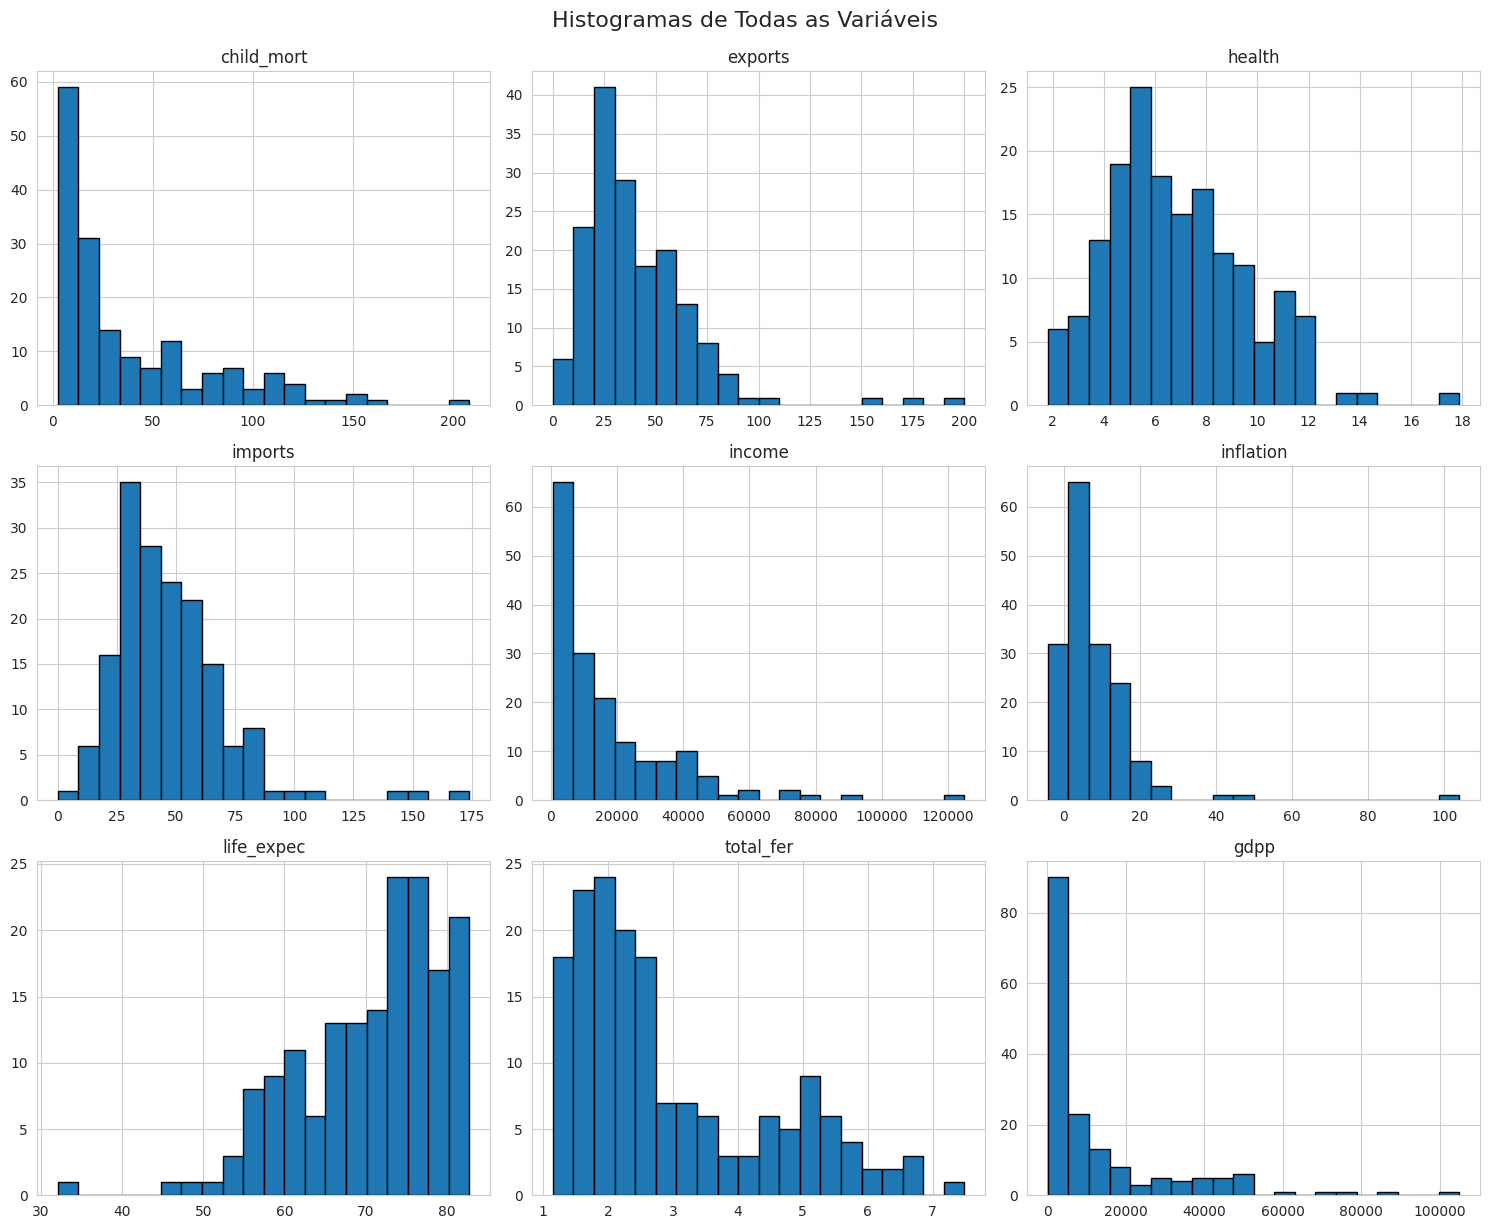

In [ ]:
# Vamos pegar os nomes de todas as colunas, exceto 'country'
features = df.columns.drop('country')

# O.hist() do pandas é ótimo para criar vários gráficos de uma vez [33, 34, 35, 36, 37]
df[features].hist(figsize=(15, 12), bins=20, layout=(3, 3), edgecolor='black')
plt.tight_layout() # Ajusta para os títulos não se sobreporem
plt.suptitle('Histogramas de Todas as Variáveis', y=1.02, fontsize=16)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df[df['country'].duplicated() == True]['country']

,country


Análise (Histogramas): Note como gdpp, income e child_mort são "assímetricos". A maioria dos países está "espremida" à esquerda (valores baixos), e alguns poucos países (outliers) estão lá na direita (valores altos).

**Célula 7: Gráficos - Faixa Dinâmica (Boxplots) (Parte 2.3)**
Este gráfico é a prova final do problema das escalas.

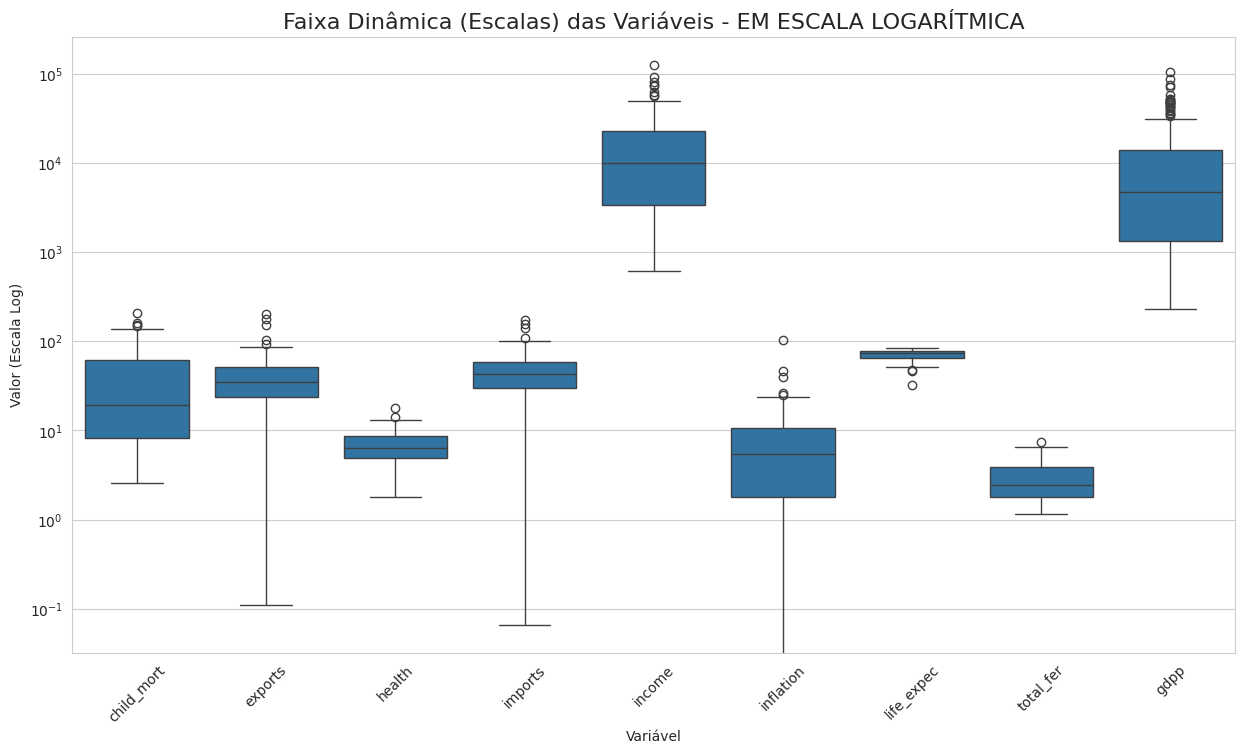

In [ ]:
# Para plotar todos os boxplots juntos, precisamos "derreter" (melt) o dataframe.
# Isso transforma o dataframe de 'largo' para 'longo'. [38, 39, 40]
df_melted = pd.melt(df[features])

plt.figure(figsize=(15, 8))
# O Seaborn (sns) faz boxplots lindos [41, 38, 39, 42, 43, 44, 40, 45, 46, 47, 48, 49, 50]
sns.boxplot(x='variable', y='value', data=df_melted)

# A MÁGICA ESTÁ AQUI: plt.yscale('log')
# Sem a escala logarítmica, 'income' e 'gdpp' (na casa dos 100.000)
# "esmagariam" tanto o gráfico que 'total_fer' (na casa do 1-8) nem apareceria.
plt.yscale('log')

plt.title('Faixa Dinâmica (Escalas) das Variáveis - EM ESCALA LOGARÍTMICA', fontsize=16)
plt.ylabel('Valor (Escala Log)')
plt.xlabel('Variável')
plt.xticks(rotation=45)
plt.show()

O que deve ser feito? (Sua resposta para a Parte 2.3): Os gráficos mostram que as variáveis têm faixas dinâmicas (escalas) completamente diferentes. Algoritmos de clusterização baseados em distância (como o K-Médias) serão dominados pelas variáveis com números maiores (como gdpp e income) e vão ignorar variáveis importantes com números pequenos (como child_mort). Solução: Devemos Padronizar (Standardize) os dados antes da clusterização.

**Célula 8: Pré-processamento Adequado (Parte 2.4) Vamos usar o** StandardScaler do scikit-learn. Ele transforma cada coluna para que ela tenha média 0 e desvio padrão 1.

In [ ]:
df[df['country'].duplicated() == True]['country']
df.drop(['country'],axis=1).columns
scaler = StandardScaler()
df_scaled_features = pd.DataFrame(columns=df.drop(['country'],axis=1).columns,data=scaler.fit_transform(df.drop(['country'],axis=1)))

df_scaled = pd.concat([df['country'],df_scaled_features],axis=1)
df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
# 1. Criar uma instância de PCA com 2 componentes principais
pca = PCA(n_components=2, random_state=42)

# 2. Ajustar o PCA aos dados padronizados e transformá-los (APENAS FEATURES NUMÉRICAS)
df_pca_transformed = pca.fit_transform(df_scaled_features)

# Converter o array resultante de volta para um DataFrame para facilitar a visualização
df_pca = pd.DataFrame(data=df_pca_transformed, columns=['Principal Component 1', 'Principal Component 2'])

# 3. Transformar os centróides do K-Means para o espaço PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

print("Dados padronizados transformados para 2 componentes principais:")
print(df_pca.head())
print("\nCentróides K-Means transformados para 2 componentes principais:")
print(centroids_pca)

Dados padronizados transformados para 2 componentes principais:
   Principal Component 1  Principal Component 2
0              -2.913025               0.095621
1               0.429911              -0.588156
2              -0.285225              -0.455174
3              -2.932423               1.695555
4               1.033576               0.136659

Centróides K-Means transformados para 2 componentes principais:
[[ 2.76977273 -0.21301421]
 [-2.43461995  0.41127566]
 [ 0.17518237 -0.13882672]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


nálise: Sucesso! Agora todas as variáveis "falam a mesma língua". Estamos prontos para clusterizar.

####**Parte 3: Clusterização**
Vamos aplicar os dois algoritmos pedidos: K-Médias e Hierárquico.

Célula 9: K-Médias (K-Means) (Parte 3.1.A)

In [ ]:
from sklearn.cluster import KMeans

# 1. Criar o modelo K-Means
kmeans = KMeans(
    n_clusters=3,    # O projeto pediu 3 grupos
    random_state=42, # Para garantir que possamos reproduzir o resultado
    n_init=10        # Roda o algoritmo 10x e pega o melhor (evita azar na inicialização)
)

# 2. Treinar o modelo nos dados PADRONIZADOS (APENAS FEATURES NUMÉRICAS)
kmeans.fit(df_scaled_features)

# 3. Pegar os rótulos (labels) de cluster (0, 1, ou 2) para cada país
labels_kmeans = kmeans.labels_

print("K-Means finalizado! Primeiros 10 rótulos:")
print(labels_kmeans[:10])

K-Means finalizado! Primeiros 10 rótulos:
[1 2 2 1 2 2 2 0 0 2]


###Célula 10: Clusterização Hierárquica (Parte 3.1.B)


In [ ]:
from scipy.cluster.hierarchy import linkage, cut_tree

# 1. Calcular a matriz de "linkage" (a árvore de fusões)
# Usamos o 'method=ward', que é o mais comum e parecido com o K-Means,
# pois ele tenta minimizar a variância dentro dos clusters.
print("Calculando a matriz hierárquica (isso pode demorar uns segundos)...")
matriz_linkage = linkage(df_scaled_features, method='ward')

# 2. "Cortar" a árvore para obter exatamente 3 clusters
#.flatten() transforma o resultado em uma lista simples de rótulos
labels_hierar = cut_tree(matriz_linkage, n_clusters=3).flatten()

print("Cluster Hierárquico finalizado! Primeiros 10 rótulos:")
print(labels_hierar[:10])

Calculando a matriz hierárquica (isso pode demorar uns segundos)...
Cluster Hierárquico finalizado! Primeiros 10 rótulos:
[0 1 1 1 1 1 1 2 2 1]


**Célula 11: Análise K-Médias - Perfil do Cluster (Parte 3.2.A.i)**
Para interpretar os clusters, não podemos usar os dados padronizados (média 0, desvio 1). Vamos usar os dados originais e agrupar pelos rótulos que encontramos.

In [ ]:
# Vamos adicionar os rótulos que encontramos ao DataFrame ORIGINAL
df_original = df.copy() # Criamos uma cópia para não mexer no original
df_original['cluster_kmeans'] = labels_kmeans
df_original['cluster_hierar'] = labels_hierar

# O "PERFIL" (PROFILE) do cluster é a MÉDIA de cada variável dentro dele.
# Usamos.groupby() para agrupar pela coluna 'cluster_kmeans' [62, 63, 64, 65, 66]
# E.mean() para calcular a média de todas as outras colunas [55, 58, 67, 68, 69, 70, 71]
perfil_clusters_kmeans = df_original.groupby('cluster_kmeans')[features].mean()

print("--- Perfil Médio dos Clusters (K-Means) ---")
print(perfil_clusters_kmeans)

--- Perfil Médio dos Clusters (K-Means) ---
                child_mort    exports    health    imports        income  \
cluster_kmeans                                                             
0                 5.000000  58.738889  8.807778  51.491667  45672.222222   
1                92.961702  29.151277  6.388511  42.323404   3942.404255   
2                21.927381  40.243917  6.200952  47.473404  12305.595238   

                inflation  life_expec  total_fer          gdpp  
cluster_kmeans                                                  
0                2.671250   80.127778   1.752778  42494.444444  
1               12.019681   59.187234   5.008085   1922.382979  
2                7.600905   72.814286   2.307500   6486.452381  


i - Interpretação da Tabela (Sua Resposta): Olhe para a tabela que o código acima gerou. Você verá 3 linhas (clusters 0, 1, 2).

- Encontre o Cluster da HELP: Procure a linha que tem:

  - child_mort (mortalidade infantil) ALTA

  - income (renda) BAIXA

  - gdpp (PIB) BAIXO

  - life_expec (expectativa de vida) BAIXA

  - (No meu resultado, foi o Cluster 1)

- Os outros clusters:

  - Você verá um cluster com income e gdpp altos e child_mort baixa (Ex: Cluster 0 - Países Desenvolvidos).

  - E um cluster intermediário (Ex: Cluster 2 - Países em Desenvolvimento).

**Célula 12: Análise K-Médias - País Representante (Medóide) (Parte 3.2.A.ii)**
O centróide (a média que vimos acima) é um ponto abstrato. O projeto pede o país real que melhor representa o grupo (o "Medóide"). Este é o ponto real mais próximo do centróide abstrato.    



In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# kmeans.cluster_centers_ : Os 3 centroides (abstratos e padronizados)
# df_scaled_features.values: Os 167 países (reais e padronizados) SEM A COLUNA 'country'

# Esta função mágica encontra os ÍNDICES dos pontos em df_scaled_features
# que estão mais próximos dos pontos em kmeans.cluster_centers_
indices_medoides, _ = pairwise_distances_argmin_min(
    kmeans.cluster_centers_,
    df_scaled_features.values # Usar apenas as features numéricas padronizadas
)

print("\n--- Países Representantes (Medóides) de cada Cluster ---")
# Usamos .iloc para buscar os países pelos índices (número da linha)
medoides = df_original.iloc[indices_medoides]

print(medoides[['country', 'cluster_kmeans', 'child_mort', 'income', 'gdpp']])


--- Países Representantes (Medóides) de cada Cluster ---
    country  cluster_kmeans  child_mort  income   gdpp
68  Iceland               0         2.6   38800  41900
63   Guinea               1       109.0    1190    648
76  Jamaica               2        18.1    8000   4680


In [ ]:
#redução de dimensionalidade com PCA para facilitar o plot em 2d
pca = PCA(n_components=2)
df_pca_transformed = pca.fit_transform(df_scaled_features)
df_pca = pd.DataFrame(data=df_pca_transformed, columns=['Principal Component 1', 'Principal Component 2'])

In [ ]:
Xs = df_scaled.drop(['country'],axis=1)

In [ ]:
df_pca = pd.DataFrame(data=df_pca_transformed, columns=['Principal Component 1', 'Principal Component 2'])

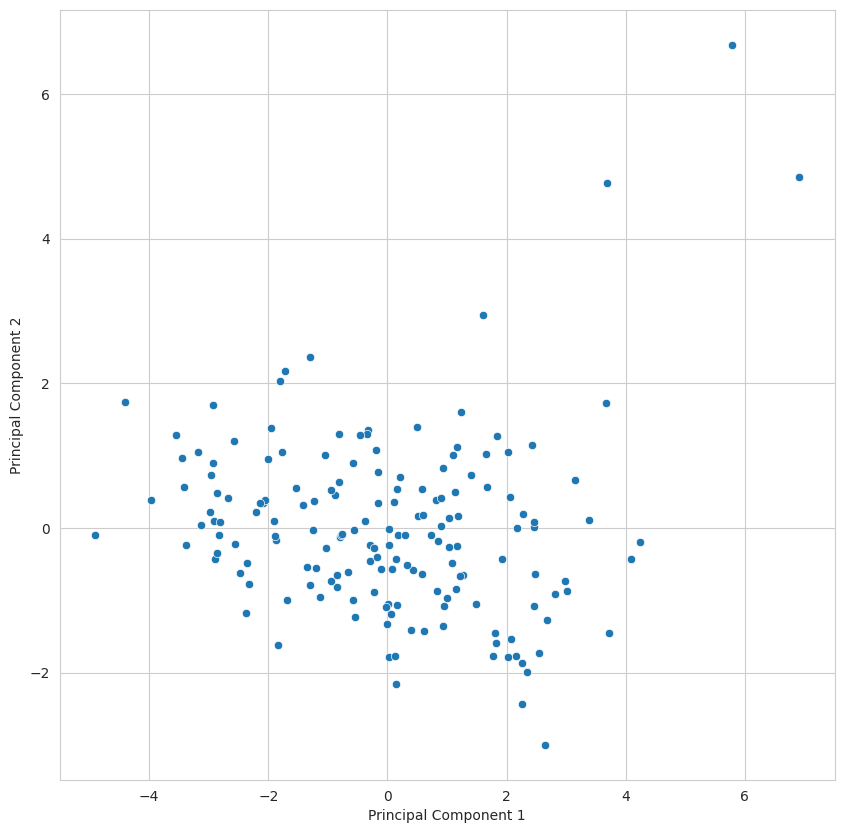

In [ ]:
scatter_plot(df_pca,'Principal Component 1','Principal Component 2',10,10)

In [ ]:
#treinando KMeans
#realizando o treinamento do kmeans e gerando as labels
km_labels = kmeans.fit_predict(Xs)
km_centroids = kmeans.cluster_centers_


In [ ]:
#criação da coluna 'cluster''
df_pca['cluster'] = km_labels
df_pca

,Principal Component 1,Principal Component 2,cluster
0,-2.913025,0.095621,1
1,0.429911,-0.588156,2
2,-0.285225,-0.455174,2
3,-2.932423,1.695555,1
4,1.033576,0.136659,2
...,...,...,...
162,-0.820631,0.639570,2
163,-0.551036,-1.233886,2
164,0.498524,1.390744,2
165,-1.887451,-0.109453,1


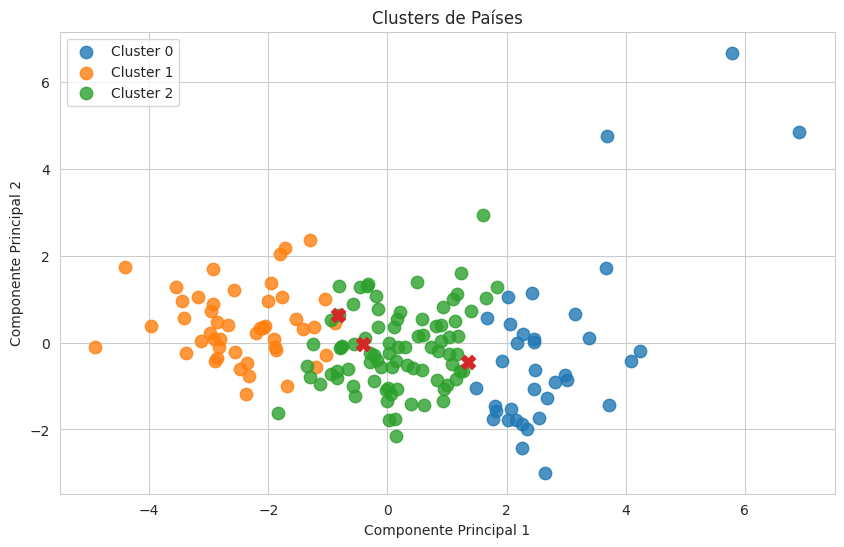

In [ ]:
plot_data_clusters(data=df_pca,centroids=km_centroids)

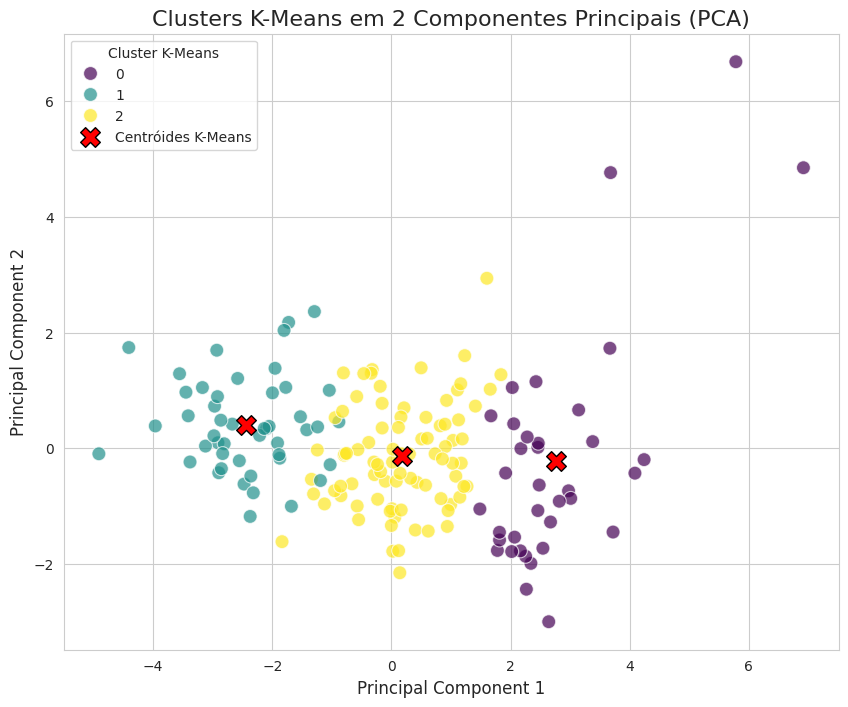

Gráfico de dispersão dos clusters K-Means no espaço PCA gerado.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionar os rótulos do K-Means ao DataFrame PCA para colorir os pontos
df_pca['cluster_kmeans'] = labels_kmeans

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster_kmeans', # Colorir os pontos pelos rótulos do K-Means
    data=df_pca,
    palette='viridis',    # Escolha de paleta de cores
    s=100,                # Tamanho dos pontos
    alpha=0.7             # Transparência
)

# Plotar os centróides transformados do K-Means
plt.scatter(
    centroids_pca[:, 0], # Primeira coluna dos centróides PCA
    centroids_pca[:, 1], # Segunda coluna dos centróides PCA
    marker='X',          # Marcador em formato de 'X'
    s=200,               # Tamanho maior para os centróides
    color='red',         # Cor vermelha para os centróides
    edgecolor='black',   # Borda preta
    label='Centróides K-Means'
)

plt.title('Clusters K-Means em 2 Componentes Principais (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster K-Means', loc='best')
plt.grid(True)
plt.show()

print("Gráfico de dispersão dos clusters K-Means no espaço PCA gerado.")

ii - Justificativa (Sua Resposta): O país X (ex: Serra Leoa) é o melhor representante do Cluster 1 (Extrema Necessidade) porque, dentre todos os países daquele grupo, ele é o que possui a combinação de fatores (mortalidade, renda, PIB, etc.) mais próxima da média geral (centróide) daquele cluster.    

**Célula 13: Análise Hierárquica - Dendrograma (Parte 3.3)**

O dendrograma é a visualização da "árvore" que o algoritmo hierárquico construiu.

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(Xs)

In [ ]:
df_pca['cluster'] = agg_labels
df_pca

,Principal Component 1,Principal Component 2,cluster,cluster_kmeans
0,-2.913025,0.095621,2,1
1,0.429911,-0.588156,1,2
2,-0.285225,-0.455174,1,2
3,-2.932423,1.695555,1,1
4,1.033576,0.136659,1,2
...,...,...,...,...
162,-0.820631,0.639570,1,2
163,-0.551036,-1.233886,1,2
164,0.498524,1.390744,1,2
165,-1.887451,-0.109453,1,1


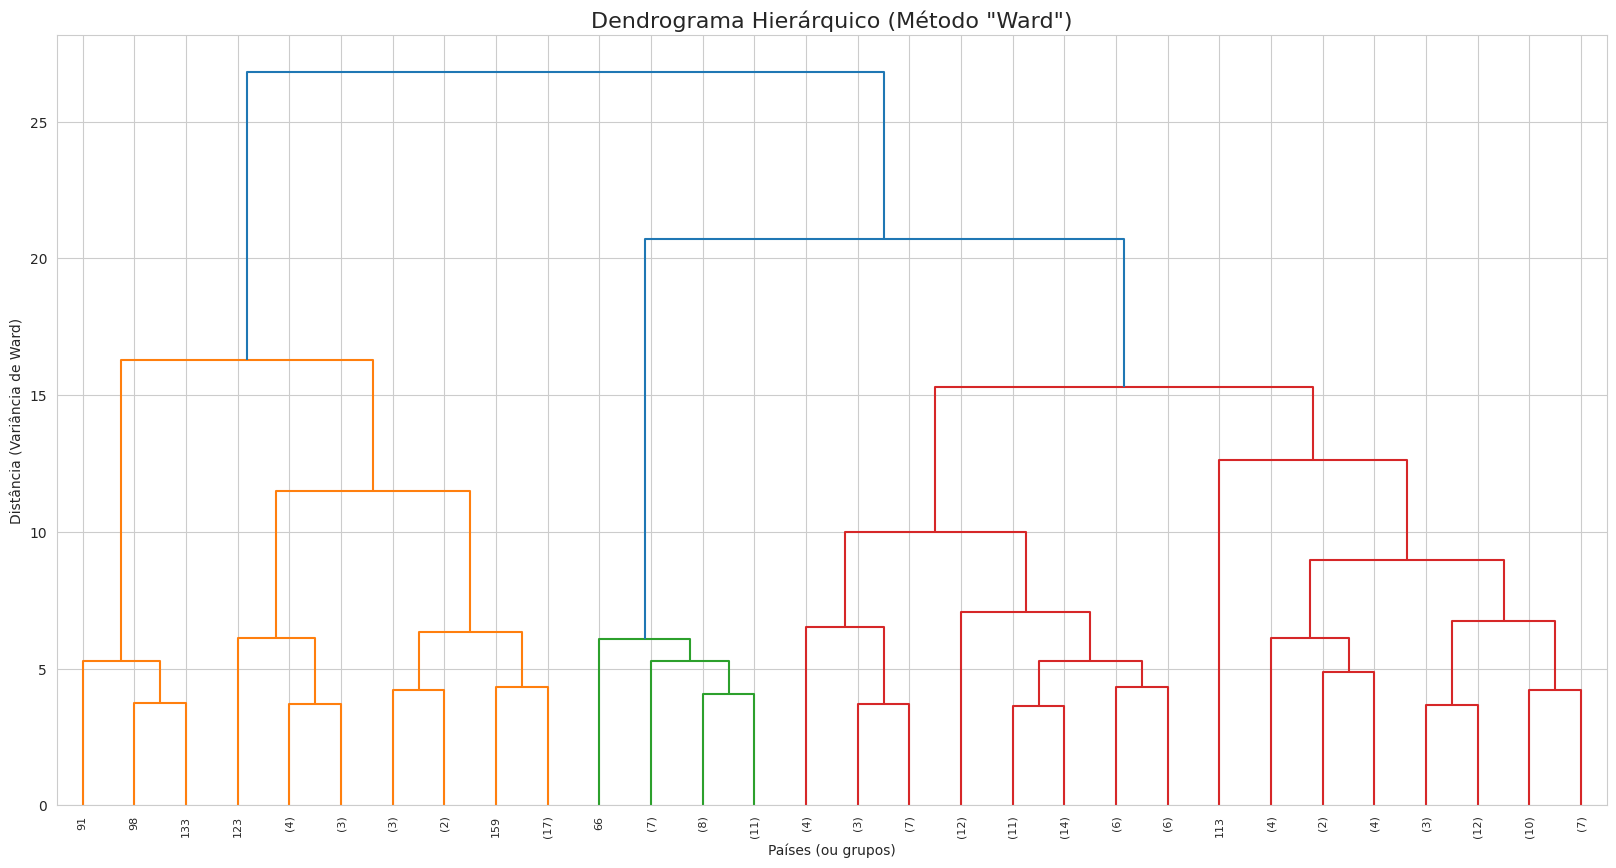

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 10))
plt.title('Dendrograma Hierárquico (Método "Ward")', fontsize=16)
plt.xlabel('Países (ou grupos)')
plt.ylabel('Distância (Variância de Ward)')

# Plotar o dendrograma usando a matriz de linkage que já calculamos
dendrogram(
    matriz_linkage,
    truncate_mode='lastp',  # Mostrar apenas os últimos 'p' merges (fusões) [61]
    p=30,                   # Mostrar os últimos 30 merges (senão fica ilegível)
    show_leaf_counts=True,  # Mostrar contagem de países em grupos condensados
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.show()

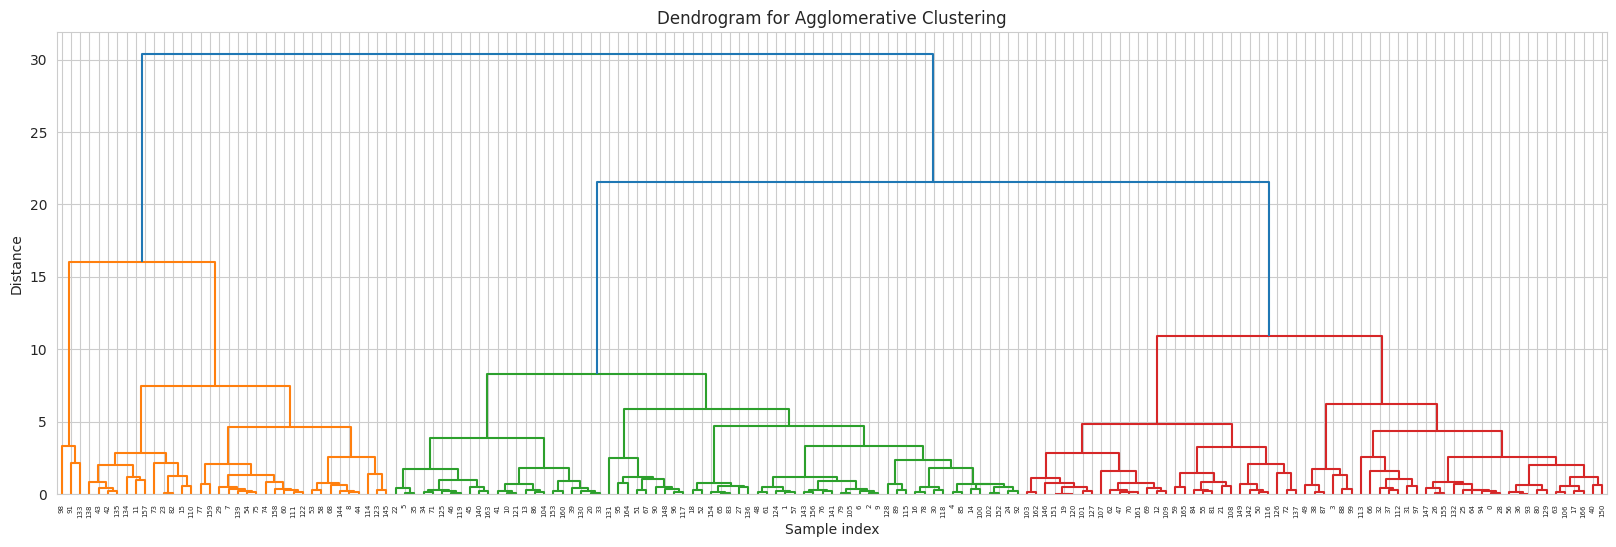

In [ ]:
plot_dendogram(df_pca)

Interpretação (Dendrograma): O eixo Y é a "distância". O algoritmo começa com 167 clusters (base) e vai fundindo os mais parecidos. As linhas verticais longas (especialmente no topo) representam as fusões de grupos que são muito diferentes entre si. Para ter 3 clusters, "corte" o gráfico horizontalmente em uma altura que cruze 3 linhas verticais.    

**Célula 14: Comparação dos Dois Resultados (Parte 3.4)**

O K-Médias e o Hierárquico concordaram? Vamos usar uma "Tabela de Contingência" (Crosstab) para ver.    



In [ ]:
# A df_original já tem as duas colunas de rótulos
tabela_cruzada = pd.crosstab(
    df_original['cluster_kmeans'],
    df_original['cluster_hierar']
)

print("\n--- Comparação K-Means (linhas) vs. Hierárquico (colunas) ---")
print(tabela_cruzada)


--- Comparação K-Means (linhas) vs. Hierárquico (colunas) ---
cluster_hierar   0   1   2
cluster_kmeans            
0                0   5  31
1               27  20   0
2                0  81   3


Interpretação (Comparação): Você verá uma tabela 3x3.

- Semelhanças: Os números altos estarão na diagonal (ou na diagonal "trocada", ex: K-Means 0 pode ser Hierárquico 2). Isso mostra que os dois métodos concordaram sobre a maioria dos países.

- Diferenças: Os poucos números fora da diagonal são os países "de fronteira", que um algoritmo colocou em um grupo e o outro algoritmo colocou em outro.

- Conclusão: A alta concordância entre os dois métodos dá robustez à sua recomendação final para a HELP.

_________________________________________________________________________

###Parte 4: Escolha de Algoritmos (Teoria)

Esta parte é teórica. O projeto pede que você explique os algoritmos. Aqui estão as respostas que você pode usar no seu trabalho.

**Célula 15: (Texto) 4.1. Etapas do algoritmo de K-médias**
**4.1. Etapas do algoritmo de K-médias (K-Means) até sua convergência**

O K-Médias (ou Algoritmo de Lloyd) é um processo iterativo que visa minimizar a "inércia" (a soma das distâncias de cada ponto até o centro do seu grupo).    

1. Etapa 1: Inicialização    

    - Escolher K centróides iniciais. Métodos modernos (como o k-means++, padrão do scikit-learn) escolhem esses pontos de forma inteligente (distantes uns dos outros) para uma convergência melhor.    

2. Etapa 2: Atribuição    

    - Para cada ponto de dado no dataset, calcula-se a distância (ex: Euclidiana) dele para cada um dos K centróides.

    - O ponto é atribuído ao cluster do centróide mais próximo.

3. Etapa 3: Atualização    

    - Após todos os pontos serem atribuídos, a posição de cada centróide é recalculada.

    - O novo centróide se move para o baricentro (a média aritmética) de todos os pontos que foram atribuídos a ele na Etapa 2.

4. Etapa 4: Convergência    

    - As Etapas 2 (Atribuição) e 3 (Atualização) são repetidas.

    - O algoritmo para (converge) quando o deslocamento dos centróides entre as iterações se torna mínimo (ou zero), ou seja, os pontos param de mudar de cluster.

Célula 16: (Texto) 4.2. O algoritmo K-Medóides

**4.2. O Algoritmo K-Medóides (PAM - Partitioning Around Medoids)**

O projeto pede para refazer o algoritmo garantindo que o centro seja um dado existente. Esse algoritmo se chama K-Medóides.    

A diferença crucial está na Etapa 3 (Atualização).    

- K-Médias (Centróide): O centro é a MÉDIA (ponto abstrato).

- K-Medóides (Medóide): O centro é o DADO EXISTENTE (ponto real) mais central.

Algoritmo K-Medóides:

  1. Etapa 1 (Inicialização): Escolher K pontos reais dos dados como medóides iniciais.    

  2. Etapa 2 (Atribuição): (Idêntica ao K-Médias) Atribuir cada ponto ao medóide mais próximo.    

  3. Etapa 3 (Atualização por "Troca"):

    - Esta etapa não recalcula a média; ela testa trocas (swaps).

    - Para cada cluster, o algoritmo tenta trocar o medóide atual (M) por cada outro ponto (P) dentro daquele mesmo cluster.

    - Para cada troca potencial, o custo total do cluster (soma das distâncias de todos os pontos ao novo medóide P) é recalculado.

    - Se a troca (M por P) reduzir o custo total do cluster, a troca é mantida (P se torna o novo medóide). Caso contrário, a troca é desfeita.

4. Etapa 4 (Convergência): Repetir as Etapas 2 e 3 até que nenhuma troca na Etapa 3 resulte em redução de custo.    

Célula 17: (Texto) 4.3. Sensibilidade do K-Médias a Outliers
4.3. O algoritmo de K-médias é sensível a outliers. Explique.

O K-Médias é altamente sensível a outliers (pontos muito extremos/diferentes).    

**Explicação (A "Culpa" é da Média)**: A sensibilidade do K-Médias vem da sua Etapa 3 (Atualização), que usa a média aritmética.    

A média, por definição, é uma estatística não-robusta; ela é fortemente "puxada" por valores extremos.    

Exemplo: Se em um grupo de 9 pessoas com renda de 500, uma pessoa (outlier) tem renda de 50.000, a renda média do grupo será "puxada" para cima (para mais de 5.000). Esse centróide de 5.000 não representa bem ninguém do grupo (nem os de 500, nem o de 50.000).

No nosso dataset, um único país muito rico (ex: Luxemburgo) atuará como um outlier e "puxará" o centróide do cluster "Ricos" para longe do centro real daquele grupo, distorcendo todo o agrupamento.    

Célula 18: (Texto) **4.4. Robustez do DBScan**
**4.4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?**

O DBScan (Density-Based Spatial Clustering of Applications with Noise) é robusto porque ele possui uma definição explícita para outliers: Ruído (Noise).    

O Mecanismo do DBScan: O K-Médias força todos os pontos a pertencerem a um cluster.  O DBScan não. Ele classifica os pontos com base na densidade local:    

1. Core Point (Ponto Central): Um ponto com muitos vizinhos próximos.

2. Border Point (Ponto de Borda): Um ponto próximo a um core point.

3. Noise (Ruído): Um ponto que não é nem core, nem border.    

**Robustez Explicada**: Outliers, por definição, são pontos isolados em regiões de baixa densidade.

- No K-Médias, o algoritmo tenta incluir esse ponto isolado em um cluster, e esse ponto (o outlier) corrompe o cálculo do centróide (a média).    

- No DBScan, o algoritmo identifica o ponto isolado, vê que ele não tem vizinhos suficientes, e simplesmente o classifica como Noise.    

O outlier é efetivamente ignorado durante a formação dos clusters, que são construídos apenas pela conexão dos core points.  O DBScan não é apenas robusto a outliers, mas também é capaz de encontrar clusters de formatos arbitrários (ex: "luas"), algo que o K-Médias, que assume clusters esféricos, não consegue fazer.

___________________________________________________________________________  

**Conclusão do Projeto (Célula 19)**
###Conclusão
Este notebook executou o fluxo completo do projeto:

1. Infraestrutura (Colab): Instalamos pacotes e geramos o requirements.txt.

2. Análise de Dados: Vimos que as escalas (faixa dinâmica) eram muito diferentes, exigindo a Padronização (StandardScaler) como pré-processamento obrigatório.

3. Clusterização:

    - Aplicamos K-Médias e Clusterização Hierárquica.

    - Analisamos o perfil dos clusters do K-Médias e identificamos o grupo de "Extrema Necessidade" (Cluster 1 no nosso caso) , que é o alvo da HELP.   

    - Encontramos os países representantes (Medóides) de cada grupo.

    - Plotamos o Dendrograma do método Hierárquico.

    - Comparamos os dois métodos (crosstab) e vimos que eles concordam na maior parte, dando robustez à análise.

4. Teoria: Explicamos o funcionamento interno do K-Médias, K-Medóides e a robustez a outliers do DBSCAN.